In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [3]:
xls_file = pd.ExcelFile("Data_weekly_final.xlsx") # Read Excel
df1=xls_file.parse("Brent") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LCOc1,LCOc3,LCOc6,LCOc9,LCOc12
Timestamp,,,,,
1988-06-24,15.65,NaN,NaN,NaN,NaN
1988-07-01,14.60,NaN,NaN,NaN,NaN
1988-07-08,15.05,NaN,NaN,NaN,NaN
1988-07-15,14.18,NaN,NaN,NaN,NaN
1988-07-22,15.71,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

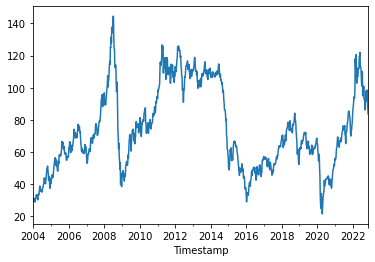

In [6]:
spot = df1["LCOc1"]
spot = spot.loc['2004-01-01':'2022-11-30']
#spot = np.log(spot).diff()
spot.plot()

In [7]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    987.000000
mean      74.063465
std       25.735714
min       21.440000
25%       54.395000
50%       69.070000
75%       97.605000
max      144.490000
Name: LCOc1, dtype: float64

In [8]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.38106259620412514
Skewness logs: -0.23346836509618438
Kurtosis spot: 2.1282179661281493
Kurtosis logs: 2.403891449571898
JB spot: Jarque_beraResult(statistic=55.141992503322804, pvalue=1.0618173007514997e-12)
JB logs: Jarque_beraResult(statistic=23.580059783982616, pvalue=7.579753398712086e-06)
Q(6) spot:       lb_stat  lb_pvalue
6  5520.63492        0.0
Q(6) logs:       lb_stat  lb_pvalue
6  5419.80057        0.0


In [9]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.9288460090027124, 0.04209496157833418, 10, 976, {'1%': -3.4370678095881804, '5%': -2.8645058608075264, '10%': -2.568349178354273}, 5068.444908385977)
ADF logs: (-3.1166189126496375, 0.02534751118728021, 12, 974, {'1%': -3.437081640468809, '5%': -2.864511960193817, '10%': -2.568352427087857}, -3034.439799323931)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.803
P-value                         0.058
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.069
P-value                         0.029
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The proce

In [10]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.478
P-value                         0.045
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.456
P-value                         0.052
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


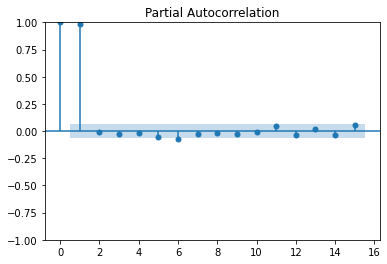

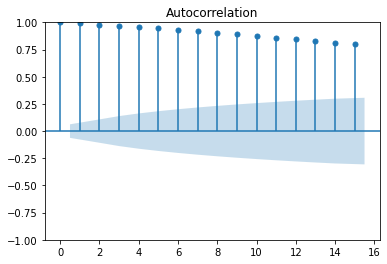

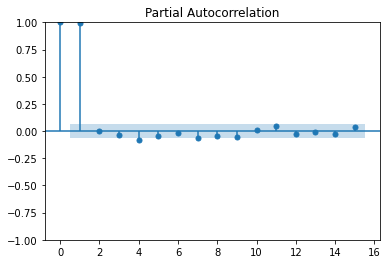

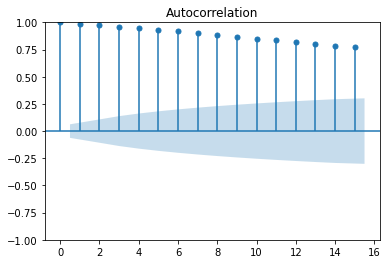

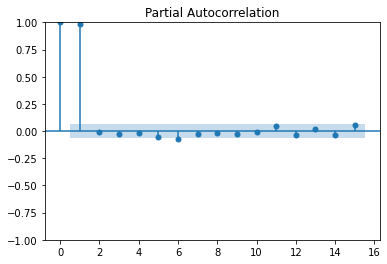

In [11]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

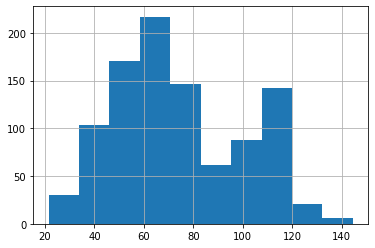

In [12]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

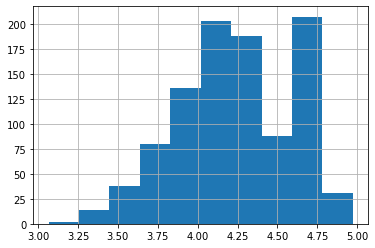

In [13]:
np.log(spot).hist()

In [16]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]*2//3))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3429.840, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3424.952, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3426.781, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3426.801, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3422.984, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3428.400, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.323 seconds


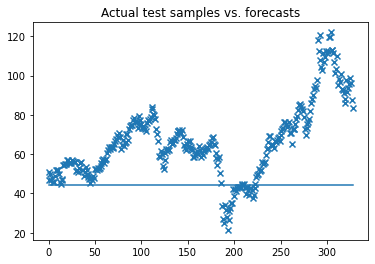

In [17]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [18]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  658
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1710.492
Date:                Wed, 28 Dec 2022   AIC                           3422.984
Time:                        13:01:47   BIC                           3427.472
Sample:                             0   HQIC                          3424.724
                                - 658                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.6877      0.365     29.292      0.000       9.973      11.403
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               365.59
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.84
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

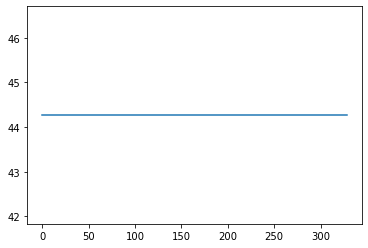

In [19]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [20]:
arima.predict(n_periods=test.shape[0])

array([44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27,
       44.27, 44.27,

<AxesSubplot:xlabel='Timestamp'>

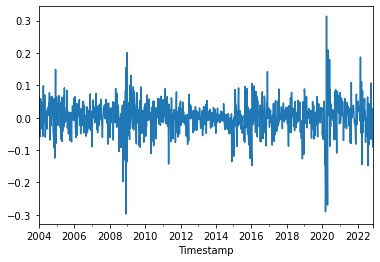

In [21]:
spot2 = np.log(spot).diff()
spot2.plot()

In [22]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    986.000000
mean       0.001063
std        0.050182
min       -0.297136
25%       -0.022791
50%        0.004092
75%        0.027451
max        0.313519
Name: LCOc1, dtype: float64

In [23]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.44332263941240574
Kurtosis spot: 8.79092208295886
JB spot: Jarque_beraResult(statistic=1410.0177318109927, pvalue=0.0)
Q(6) spot:     lb_stat  lb_pvalue
6  8.970665   0.175235


In [24]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-8.773512840187045, 2.484162309639614e-14, 11, 974, {'1%': -3.437081640468809, '5%': -2.864511960193817, '10%': -2.568352427087857}, -3022.984856839601)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -31.047
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [25]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.115
P-value                         0.515
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


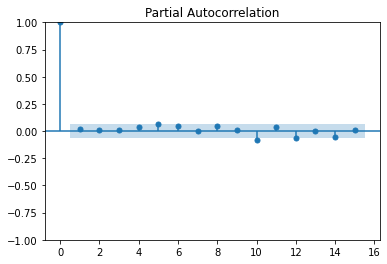

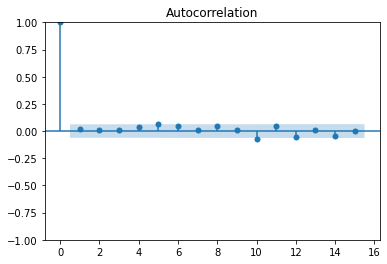

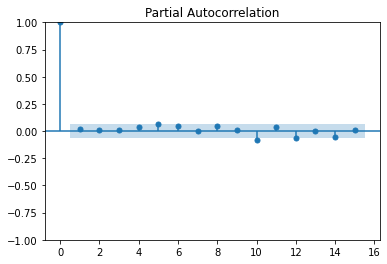

In [26]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

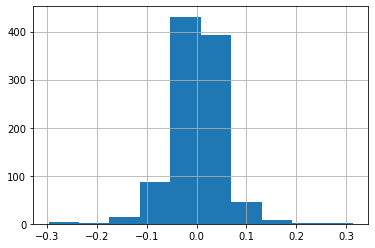

In [27]:
spot2.hist()


In [28]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=(spot2.shape[0]*2//3))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2178.475, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2181.351, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2179.805, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2179.760, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2177.644, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2179.510, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.345 seconds


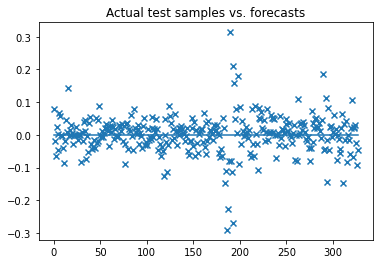

In [29]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [30]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  658
Model:                        SARIMAX   Log Likelihood                1091.676
Date:                Wed, 28 Dec 2022   AIC                          -2181.351
Time:                        13:02:13   BIC                          -2176.862
Sample:                             0   HQIC                         -2179.611
                                - 658                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0021   6.87e-05     30.861      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):               445.96
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.63
Prob(H) (two-sided):                  0.83   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

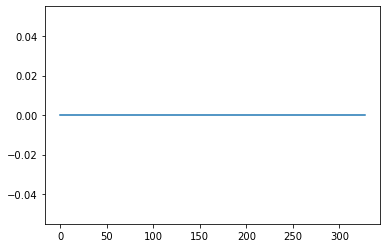

In [31]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [32]:
arima2.predict(n_periods=test2.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))